In [14]:
import cv2

# Cargar imagenes 

---
- descargar
- descomprimir


In [5]:
# !wget https://github.com/joaramirezra/Mineral-Border-Dectetion/raw/main/images/minerals.zip
# !ls

In [6]:
# !unzip minerals.zip
# !ls

In [7]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [8]:
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0

4423680/4422102 [==============================] - 0s 0us/step


In [9]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [10]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               204928    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [11]:
model.fit(training_images, training_labels, epochs=5)
test_loss = model.evaluate(test_images, test_labels)

Epoch 1/5
1875/1875 [==============================] - 77s 41ms/step - loss: 0.4398 - accuracy: 0.8405
Epoch 2/5
1875/1875 [==============================] - 76s 41ms/step - loss: 0.2920 - accuracy: 0.8935
Epoch 3/5
1875/1875 [==============================] - 75s 40ms/step - loss: 0.2481 - accuracy: 0.9081
Epoch 4/5
1875/1875 [==============================] - 80s 43ms/step - loss: 0.2164 - accuracy: 0.9190
Epoch 5/5
313/313 [==============================] - 4s 11ms/step - loss: 0.2453 - accuracy: 0.9093


---

# Visualization 




In [28]:
img = cv2.imread('type3/Muestra1.png',1)
img = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)
img.shape


[[0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.08235294]
 [0.48235294]
 [0.42352941]
 [0.38823529]
 [0.38823529]
 [0.32941176]
 [0.3254902 ]
 [0.3372549 ]
 [0.36078431]
 [0.2745098 ]
 [0.02352941]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]] [[0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.41568627]
 [0.97254902]
 [0.90196078]
 [0.80392157]
 [0.9372549 ]
 [0.83137255]
 [0.68235294]
 [0.84313725]
 [0.81176471]
 [0.54509804]
 [0.36470588]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]] [[0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.49803922]
 [0.84705882]
 [0.83529412]
 [0.80392157]
 [0.83921569]
 [0.83921569]
 [0.

ValueError: ignored

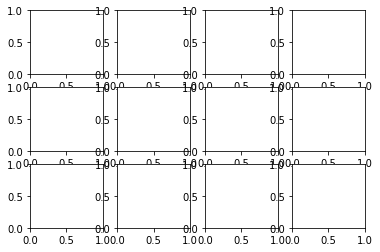

In [19]:
import matplotlib.pyplot as plt

f, axarr = plt.subplots(3,4)
FIRST_IMAGE=0
SECOND_IMAGE=7
THIRD_IMAGE=26
CONVOLUTION_NUMBER = 1

from tensorflow.keras import models

layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)

for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 194, 295, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)